# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

Kindly use this template to get an overview of the structure that you need to follow in your capstone project.

Ensure that the final insights that you produce in your analysis stand out and are easily accessible.

You need to provide the code snippets that you used to run the code.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** [SHUVAM CHATTERJEE]  
**Date:** [08-31-2024]

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
Briefly describe the purpose of the project and outline the key objectives.

The main goal to this project is understanding customer sentiments towards speakers of different brands by analyzing customer reviews extracted from Amazon website. Our focus lies primarily on the Beats Pill Speakers (Statement Red and Matte Black) and how they perform compared to their competitors from other brands. The project also aims to provide insights and strategic recommendations on the areas of product development for the purpose of improving customer experience and creating a strong brand loyalty among customers towards Beats by Dre speakers.

The following steps have been performed in this project:

1. Data collection of customer reviews from Amazon webpages of different speakers including Beats.

2. Cleaning and preprocessing the dataset.

3. Performing EDA and appropriate data visualization using statistical tools for identifying patterns and correlations between different features of the dataset

4. Conducting sentiment Analysis of all products to using Textblob library for understanding customer opinions.

5. Utilising Gemini AI for gathering specific insights from the reviews.

6. Finally, summarizing the key insights in a comprehensive report alongwith strategic recommendations for improvement of the product.

### 3.2 Background
Provide context about Beats by Dre and the importance of consumer sentiment analysis in the tech industry.

Beats by Dre is a premium audio products brand which is a subsidiary of Apple. It focuses on headphones, speakers and earbuds and is known for aggressive marketing through targeted ad campaigns, collaboration and building strong connections with customers. Beats targeted audience are predominantly the youth and it emphasizes on superior sound quality and a rich listening experience for its users.

Just like any other consumer focused company, Beats faces the constant need for improvement and innovation based on the ever changing trends of consumer preferences, to maintain its standard and compete with other brands available in the market. Since most of the business happens online, it is in the best interest of the company to gather data and extract some meaningful insights from it in order to make informed business decisions.

## 4. Data Description

### 4.1 Data Sources
Describe the sources of your data (e.g., Amazon reviews).

The products chosen for this project are speakers from various brands with special focus on the Beats Pill Speakers. Amazon.com is the data source where huge amounts of consumer data are available.
Some of the distinctive features of Beats Pill speakers are the following:

1. Compatibility with Apple and Android including instant one-touch pairing and automatic pairing across your other devices, plus Find My or Find My Device

2. Easy pairing of two Beats Pill speakers for twice the output experience in Amplify mode or Stereo mode

3. Upto 24 hours of battery life for all-day playback

Links for some of the main products we focused on are as follows:



*   https://www.amazon.com/gp/aw/d/B0D4SX9RC6/
*   https://www.amazon.com/gp/aw/d/B01IOD7KB6/
*   https://www.amazon.com/Bose-SoundLink-Revolve-Portable-Bluetooth/dp/B08VL5S148/
*   https://www.amazon.com/JBL-Flip-Bluetooth-Waterproof-PartyBoost/dp/B09GJXM4DX/
*   https://www.amazon.com/Marshall-Stockwell-Portable-Bluetooth-Speaker/dp/B088KRKFJ3/
*   https://www.amazon.com/Sonos-ROAM1US1BLK-Roam-Black/dp/B08Z1RP9K8/
*   https://www.amazon.com/Sony-Portable-Bluetooth-Party-Speaker-Hour-Battery-Retractable/dp/B0B43Y8GHZ/










### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

The data collection process involved the used of a web scrapper API called Oxylabs. The challenge faced in the process was the limited number of reviews that were being scrapped due to certain legal restrictions and Oxylabs free tier limitations. The more the data, the better the analysis can be performed.
The rest of the data collection was done by Externship team and provided for reference.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews_df = pd.read_csv('/content/reference_dataset_for_beats_externship1.csv',  encoding='ISO-8859-1')
reviews_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2076 non-null   int64 
 1   review_id           2076 non-null   object
 2   product_name        2076 non-null   object
 3   title               2076 non-null   object
 4   author              2076 non-null   object
 5   rating              2076 non-null   int64 
 6   content             2074 non-null   object
 7   timestamp           2076 non-null   object
 8   profile_id          2076 non-null   object
 9   is_verified         2076 non-null   int64 
 10  helpful_count       2076 non-null   int64 
 11  product_attributes  2066 non-null   object
dtypes: int64(4), object(8)
memory usage: 194.8+ KB


### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

The most important step is to deal with Null values. Here we have null values in 'content' and 'product_attributes' columns. We have solved the issues as :

1. For the content column, we have we have simply dropped the two rows containing the null values as they are of no use without the reviews.

2. For the product_attributes column, we have found out the mode (Color: Black) for the column and replaced the null values with it. Since, Black is the most frequent in the column, it has the highest probability of being in the places of missing information.

In [ ]:
reviews_df = reviews_df.dropna(subset=['content'])

In [ ]:
reviews_df['product_attributes'] = reviews_df['product_attributes'].str.strip()
reviews_df['product_attributes'].replace(['unknown', ''], pd.NA, inplace=True)
mode_value = reviews_df['product_attributes'].mode()[0]
print(mode_value)
reviews_df['product_attributes'].fillna(mode_value, inplace = True)

Color: Black


We checked for number of products for each product category and the same for product attributes as both are categorical columns. We also checked for duplicate values in our dataset and found none. We also dropped the unimportant columns.

In [ ]:
reviews_df['product_attributes'].value_counts()

,count
product_attributes,
Color: Black,515
Unknown,100
Color: Signature Black,99
Color: Luxe Silver,99
Color: Black & BrassStyle: Emberton II,73
Size: SingleColor: Black,64
Color: Matte BlackStyle: PillPattern: Without AppleCare+,64
Color: Stone Blue,63
Color: Blue,62


In [ ]:
reviews_df['product_name'].value_counts()

,count
product_name,
"JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker with Powerbank USB Charge out, 20 hours playtime, JBL Partyboost (Black)",117
"Marshall Emberton II Portable Bluetooth Speaker, Black & Brass",115
"Sony ULT Field 1 Wireless Ultra Portable Bluetooth Compact Speaker, IP67 Waterproof, Dustproof, Shockproof and Rustproof with Enhanced Bass, 12 Hour Battery and Detachable Strap, Black - New",105
"Sony SRS-XG300 X-Series Wireless Portable-Bluetooth Party-Speaker IP67 Waterproof and Dustproof with 25 Hour-Battery and Retractable Handle, Black- New",102
"Bose SoundLink Flex Bluetooth Speaker, Portable Speaker with Microphone, Wireless Waterproof Speaker for Travel, Outdoor and Pool Use, White",101
"Sony SRS-XE200 X-Series Wireless Ultra Portable-Bluetooth-Speaker, IP67 Waterproof, Dustproof and Shockproof with 16 Hour Battery and Easy to Carry Strap, Black",100
"Bang & Olufsen Beosound Explore - Wireless Portable Outdoor Bluetooth speaker, IP 67 Dustproof and Waterproof, Anthracite",100
Sonos Roam - Black - Wireless Portable Bluetooth Speaker,100
"Marshall Stockwell II Portable Bluetooth Speaker, Black and Brass",100


In [ ]:
reviews_df = reviews_df.drop(columns = ['author', 'review_id', 'profile_id', 'Unnamed: 0' ])

In [ ]:
reviews_df.duplicated().sum()

0

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


Now we perform descriptive statistics on the 'ratings' column (nominal data).

In [ ]:
mean_rating = reviews_df['rating'].mean()
mean_rating



4.415139826422372

In [ ]:
median_rating = reviews_df['rating'].median()
median_rating



5.0

In [ ]:
mode_rating = reviews_df['rating'].mode()
mode_rating

,rating
0,5


In [ ]:
rating_var = reviews_df['rating'].var()
rating_var

1.2298912732514893

In [ ]:
rating_std = reviews_df['rating'].std()
rating_std

1.1090046317538487

In [ ]:
rating_quantiles = reviews_df['rating'].quantile([0.25, 0.5, 0.75])
rating_quantiles

,rating
0.25,4.0
0.50,5.0
0.75,5.0


In [ ]:
rating_range = max(reviews_df['rating']) - min(reviews_df['rating'])
rating_range

4

### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

Now, we wanted to visualize the distribution of the ratings in our dataset and so we used Histogram along with kernel density function to smoothen it.

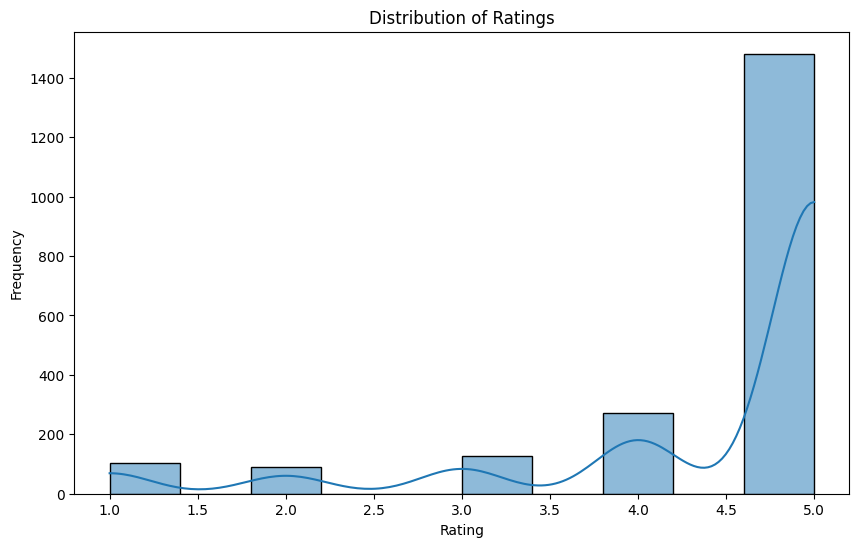

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['rating'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

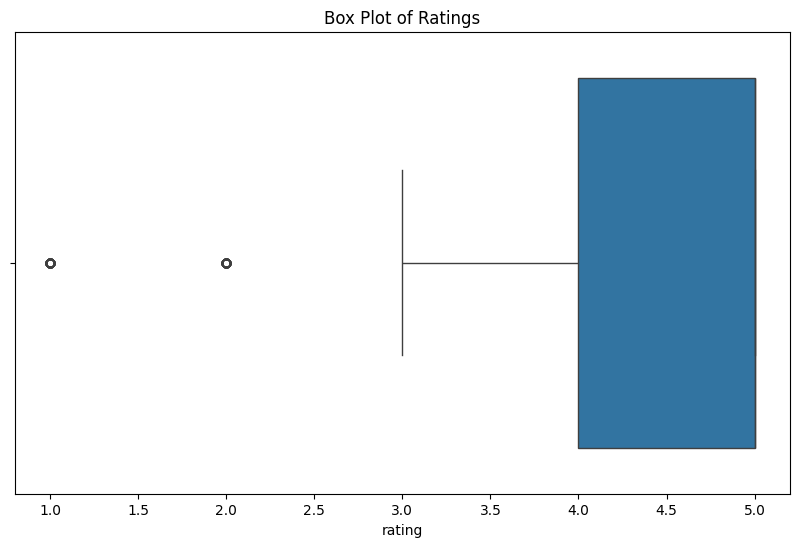

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = reviews_df['rating'])
plt.title('Box Plot of Ratings')
plt.show()

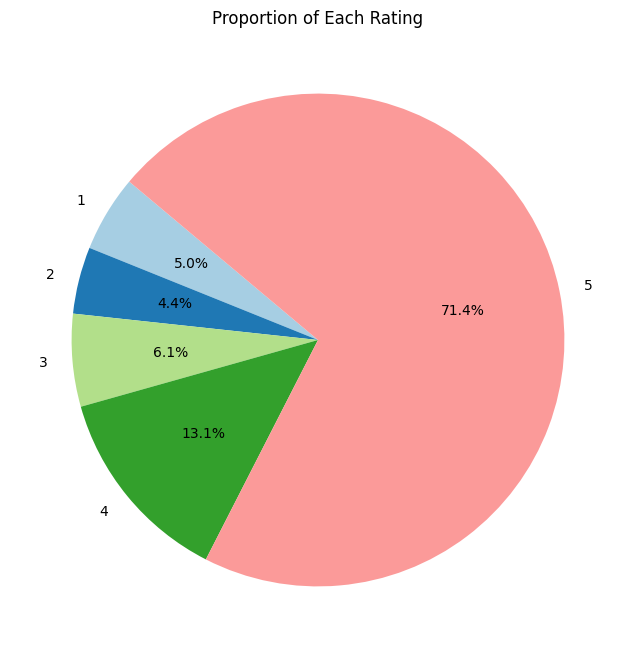

In [ ]:
rating_counts = reviews_df['rating'].value_counts().sort_index()
plt.figure(figsize = (8, 8))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(rating_counts))))
plt.title('Proportion of Each Rating')
plt.show()

<ipython-input-21-d6a5debba35c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='rating', data = average_ratings, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


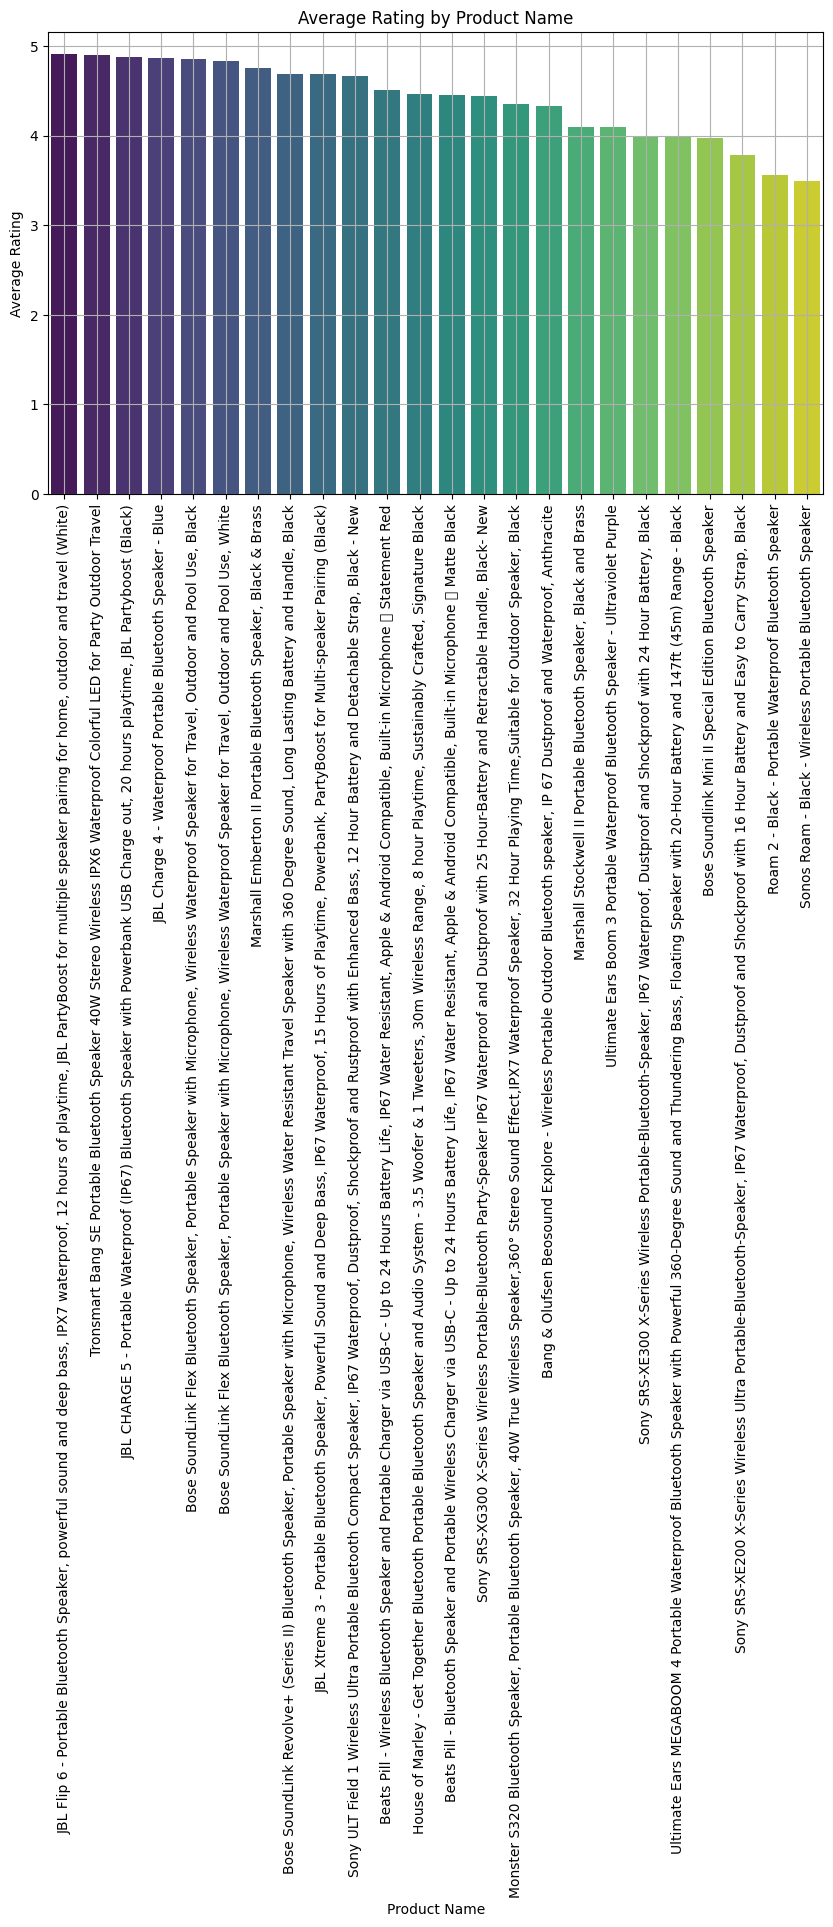

In [ ]:
average_ratings = reviews_df.groupby('product_name')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='rating', data = average_ratings, palette='viridis')
plt.title('Average Rating by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

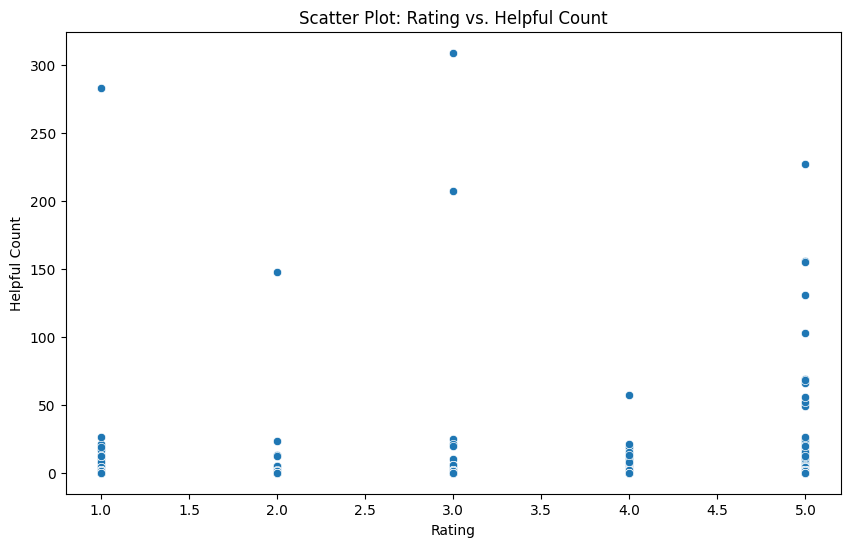

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='helpful_count', data=reviews_df)
plt.title('Scatter Plot: Rating vs. Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

In [ ]:
from scipy import stats
skewness = stats.skew(reviews_df['rating'])
print(f"Skewness: {skewness}")

kurtosis = stats.kurtosis(reviews_df['rating'])
print(f"Kurtosis: {kurtosis}")

Skewness: -1.9473144504312863
Kurtosis: 2.7207553575763983


1. The ratings histogram along with the skewness and kurtosis values proves that our ratings distribution is left skewed. In other words, ratings closer to 5 have the highest count in the dataset.

2. The pie chart of the ratings confirms it as we can see that the highest rating 5 has 71.4% share among all the given ratings.

3. From the Bar plot, we figure out that JBL Flip 6 has the highest average rating followed by Tronsmart Bang.

4. From the Box plot of ratings, we confirm the presence of outliers in the ratings which might have impacted the mean to some extent.

## 6. Sentiment Analysis

### 6.1 Methodology
Explain the sentiment analysis techniques used (e.g., TextBlob, NLTK) and provide code snippets.

We now perform sentiment analysis using Textblob library. It provides polarity and subjectivity scores for all the reviews.

1. Polarity ranges from -1 to 1 where -1 implies extreme negative sentiment, 0 being neutral and 1 for extremely positive sentiment.

2. Subjectivity score varies from 0 to 1 in which higher the score (or closer to 1), more the review is opinion based and lower the score (or closer to 0) more it is fact based.

In [ ]:
from textblob import TextBlob
# Performing Sentiment Analysis

def sentiment_analysis(text):
  blob = TextBlob(text)
  return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity], index=['polarity', 'subjectivity'])

reviews_df[['polarity', 'subjectivity']] = reviews_df['content'].apply(sentiment_analysis)
reviews_df.drop(columns=[reviews_df.columns[7]], inplace = True)

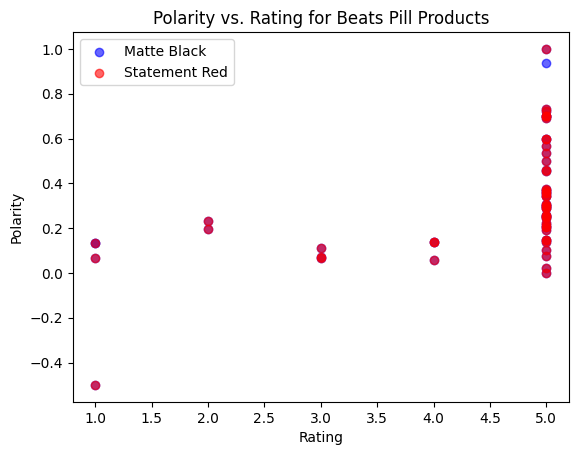

In [ ]:
plt.scatter(beats_pill_MatteBlack['rating'], beats_pill_MatteBlack['polarity'], color='blue', label='Matte Black', alpha=0.6)
plt.scatter(beats_pill_StatementRed['rating'], beats_pill_StatementRed['polarity'], color='red', label='Statement Red', alpha=0.6)

plt.title('Polarity vs. Rating for Beats Pill Products')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.legend()
plt.show()

### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


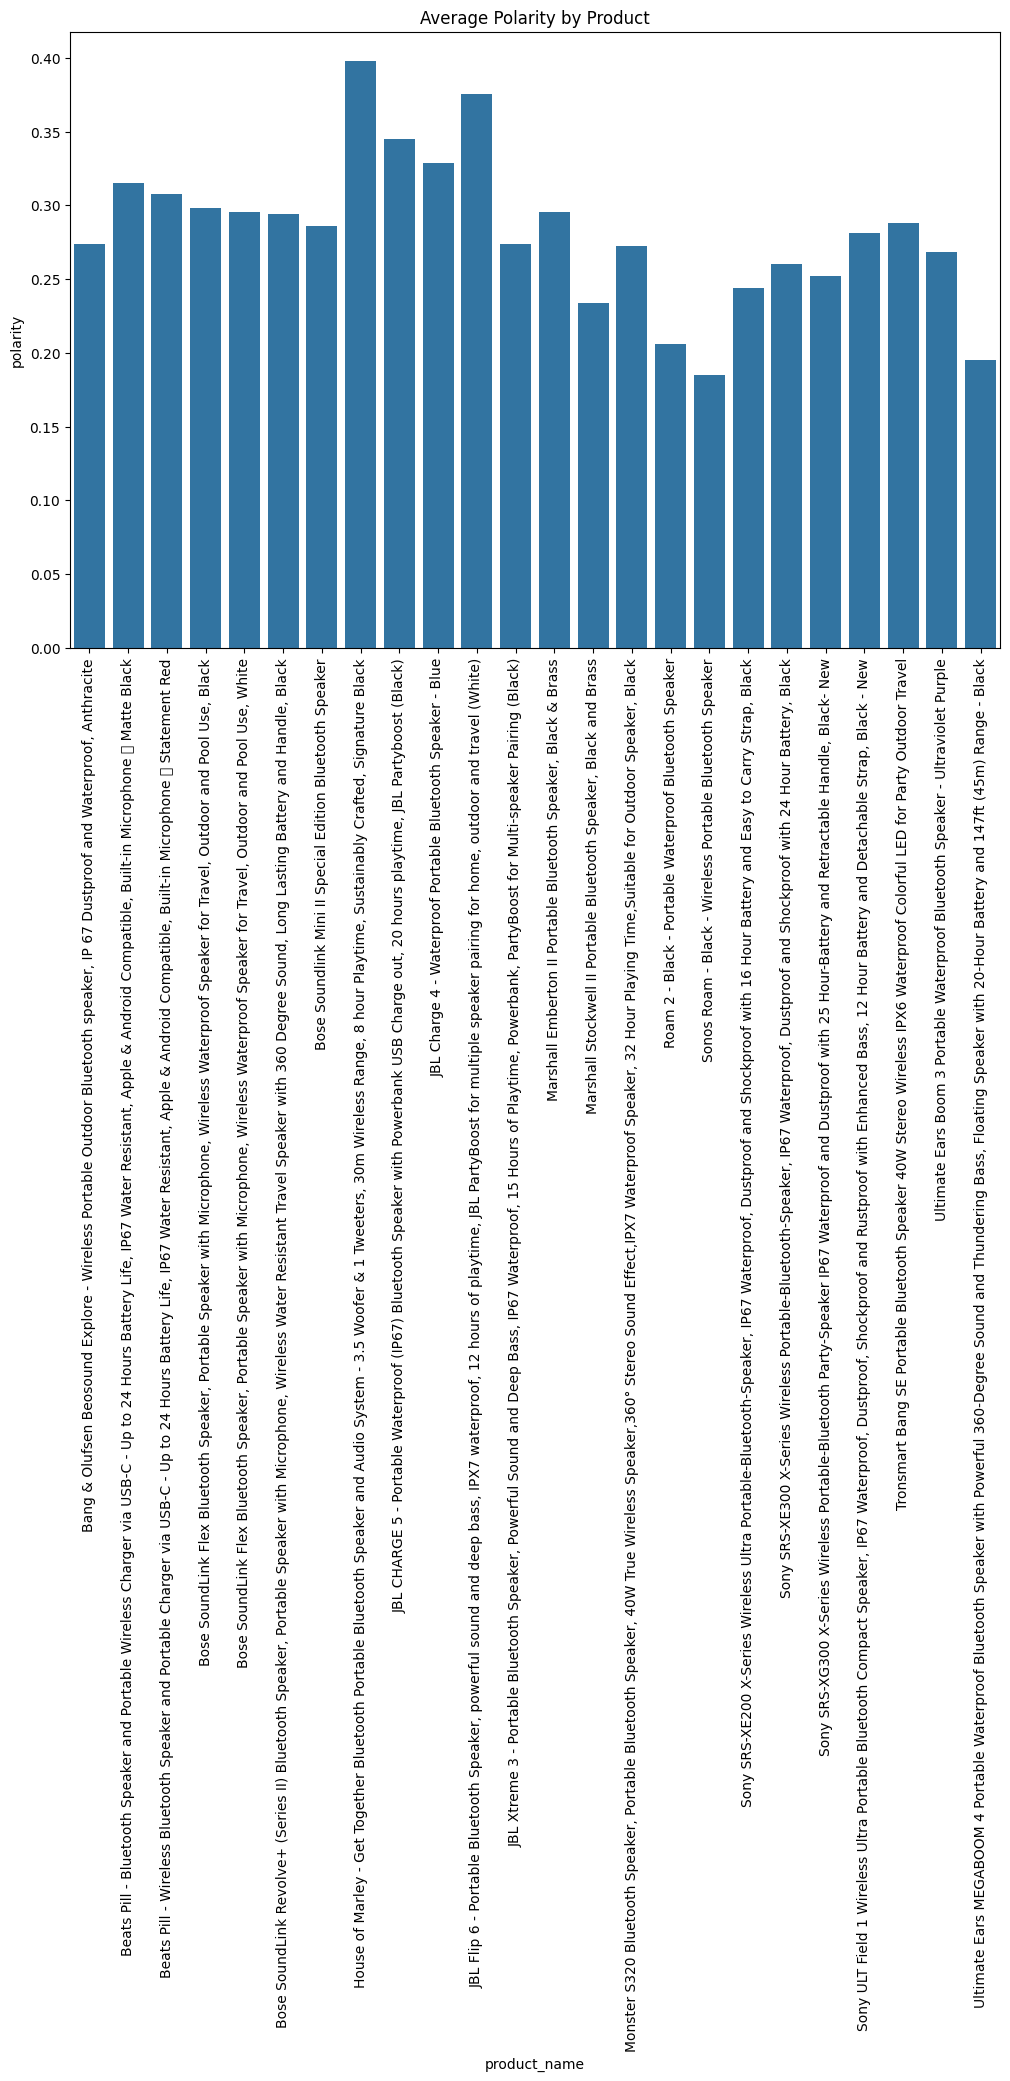

In [ ]:
plt.figure(figsize=(12, 8))
mean_polarity = reviews_df.groupby('product_name')['polarity'].mean().reset_index()
sns.barplot(x='product_name', y='polarity', data=mean_polarity)
plt.xticks(rotation=90)
plt.title('Average Polarity by Product')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


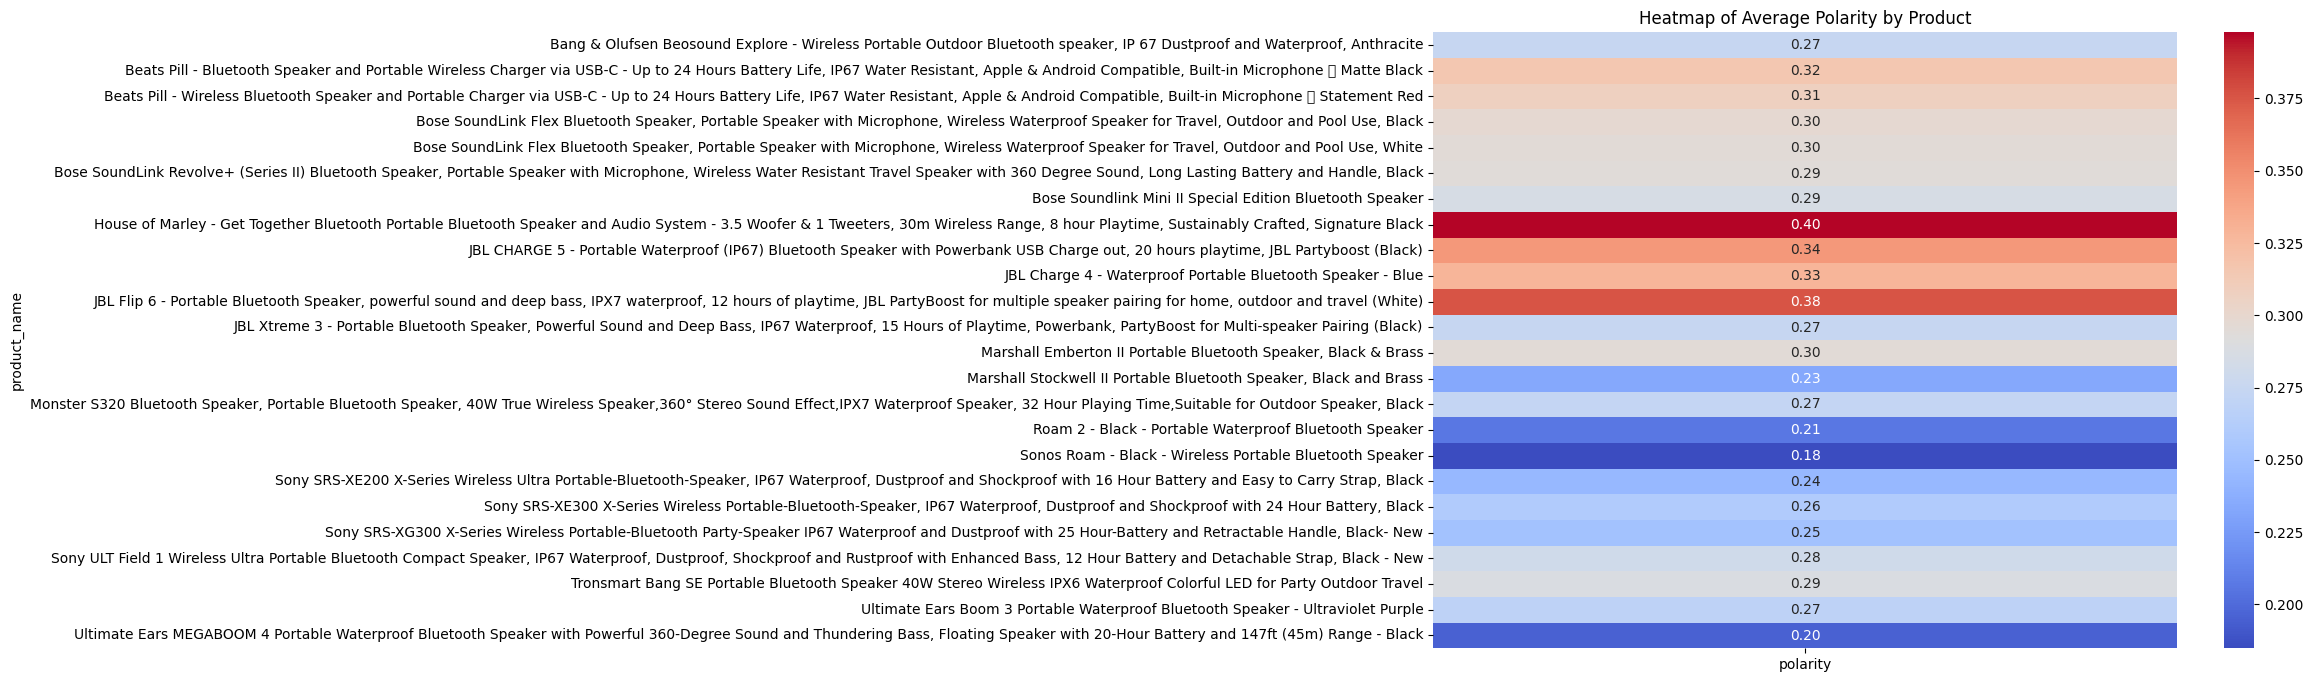

In [ ]:
heatmap_data = reviews_df.pivot_table(index='product_name', values='polarity', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Polarity by Product')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


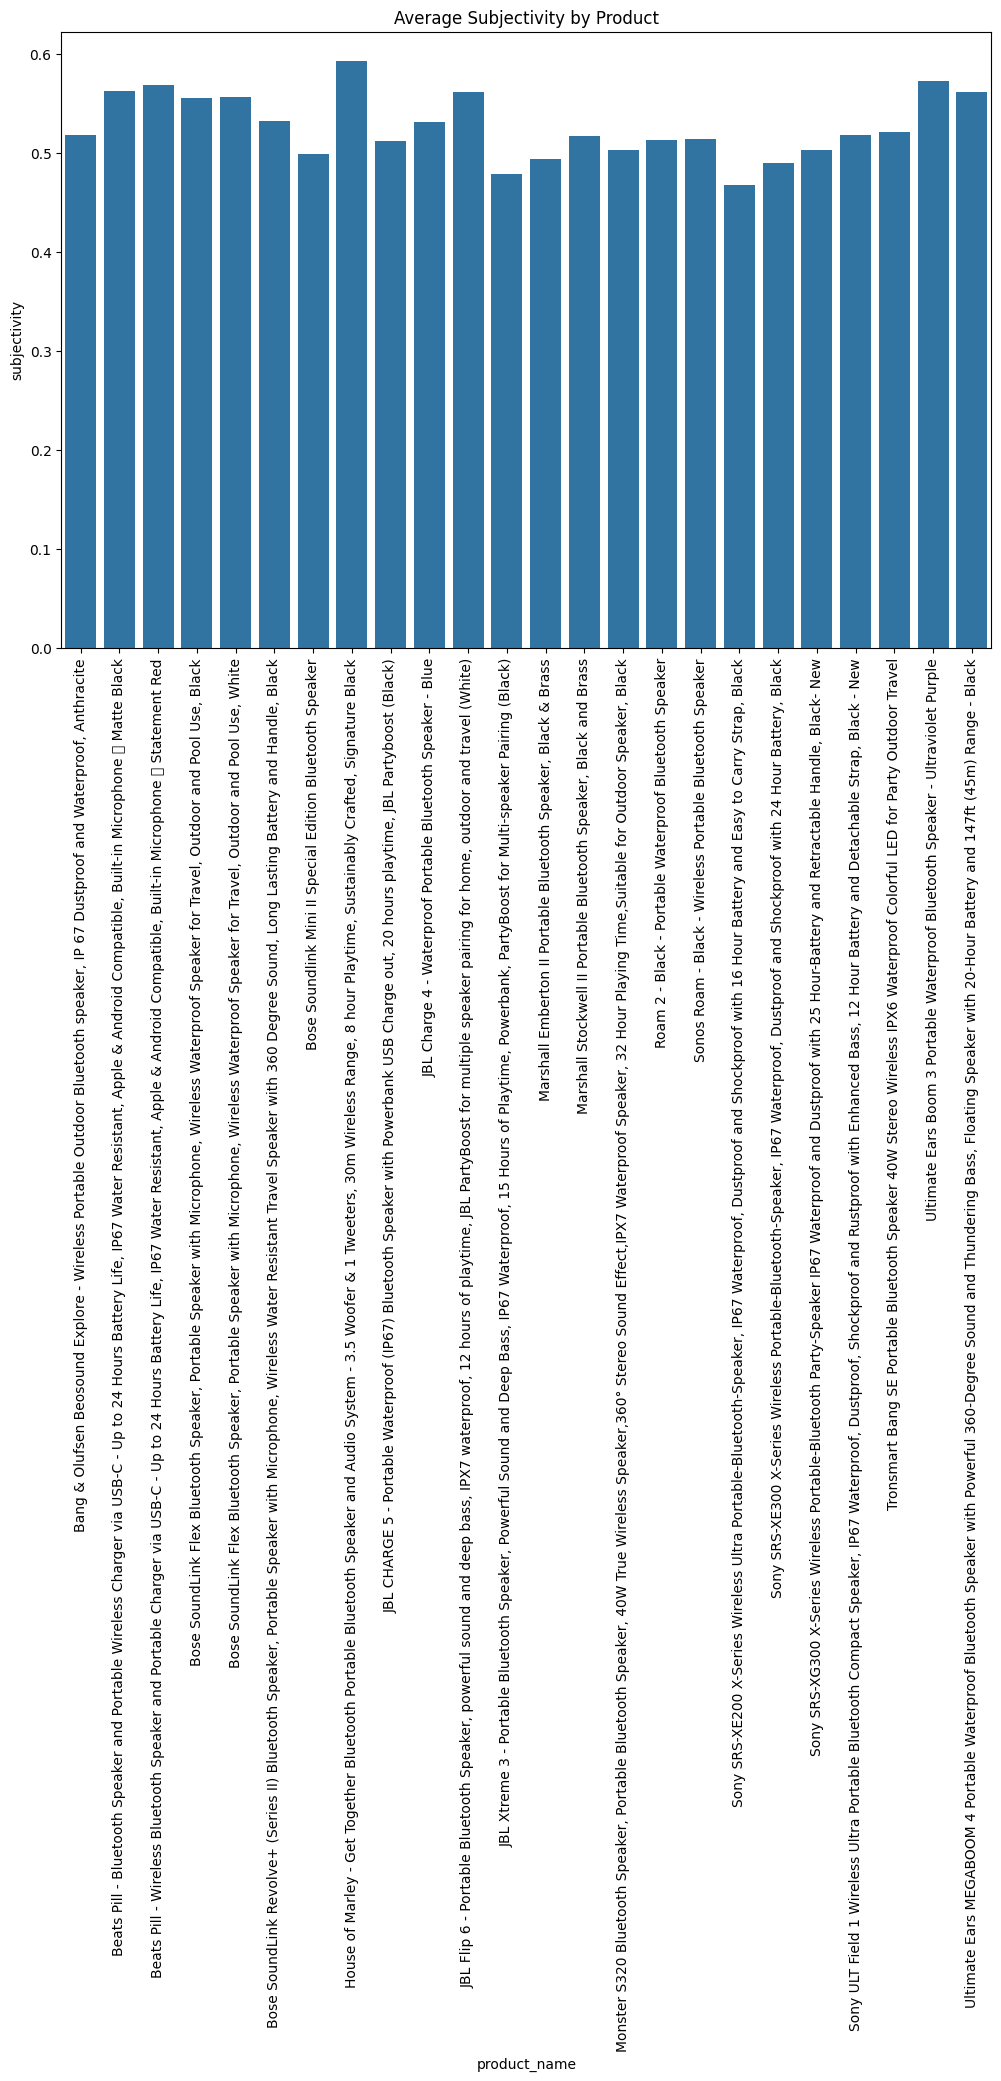

In [ ]:
plt.figure(figsize=(12, 8))
mean_polarity = reviews_df.groupby('product_name')['subjectivity'].mean().reset_index()
sns.barplot(x='product_name', y='subjectivity', data=mean_polarity)
plt.xticks(rotation=90)
plt.title('Average Subjectivity by Product')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


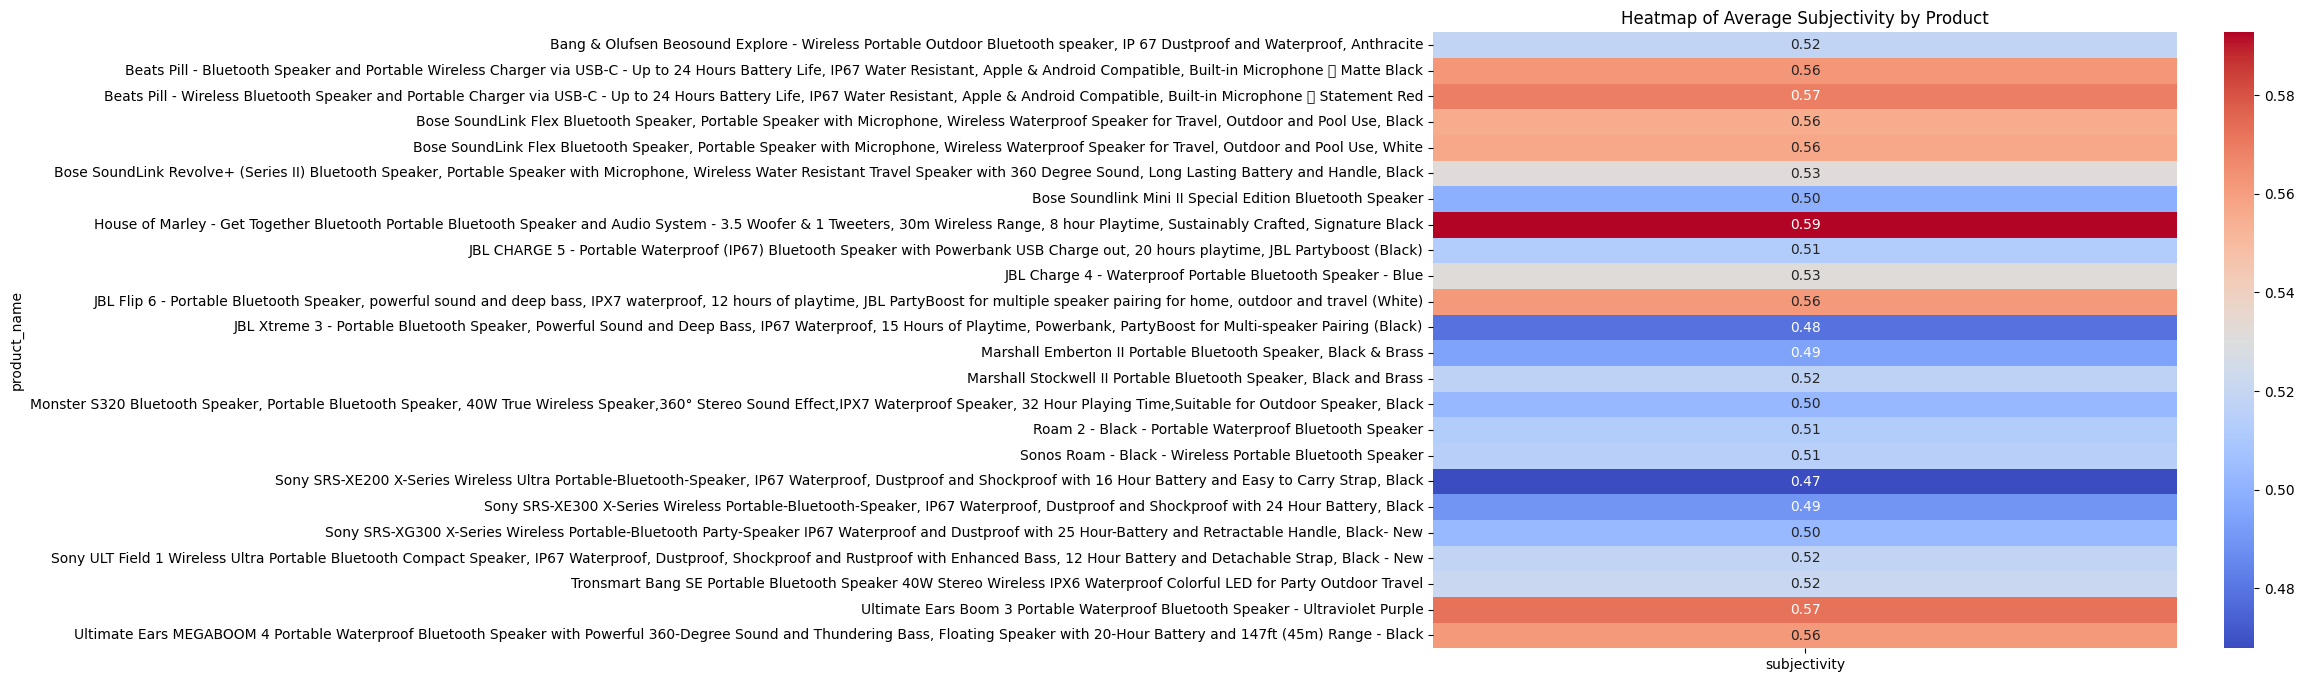

In [ ]:
heatmap_data = reviews_df.pivot_table(index='product_name', values='subjectivity', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Subjectivity by Product')
plt.show()

In [ ]:
polarity_rank_ascending = reviews_df.groupby('product_name')['polarity'].mean().reset_index()
polarity_rank_ascending = polarity_rank_ascending.sort_values(by='polarity', ascending=True).reset_index(drop=True)
polarity_rank_ascending

,product_name,polarity
0,Sonos Roam - Black - Wireless Portable Bluetoo...,0.184854
1,Ultimate Ears MEGABOOM 4 Portable Waterproof B...,0.195051
2,Roam 2 - Black - Portable Waterproof Bluetooth...,0.206043
3,Marshall Stockwell II Portable Bluetooth Speak...,0.233851
4,Sony SRS-XE200 X-Series Wireless Ultra Portabl...,0.244286
5,Sony SRS-XG300 X-Series Wireless Portable-Blue...,0.251980
6,Sony SRS-XE300 X-Series Wireless Portable-Blue...,0.260369
7,Ultimate Ears Boom 3 Portable Waterproof Bluet...,0.268222
8,"Monster S320 Bluetooth Speaker, Portable Bluet...",0.272662
9,Bang & Olufsen Beosound Explore - Wireless Por...,0.274088


In [ ]:
subjectivity_rank_descending = reviews_df.groupby('product_name')['subjectivity'].mean().reset_index()
subjectivity_rank_descending = subjectivity_rank_descending.sort_values(by='subjectivity', ascending=False).reset_index(drop=True)
subjectivity_rank_descending

,product_name,subjectivity
0,House of Marley - Get Together Bluetooth Porta...,0.592729
1,Ultimate Ears Boom 3 Portable Waterproof Bluet...,0.572522
2,Beats Pill - Wireless Bluetooth Speaker and Po...,0.569080
3,Beats Pill - Bluetooth Speaker and Portable Wi...,0.562395
4,"JBL Flip 6 - Portable Bluetooth Speaker, power...",0.561267
5,Ultimate Ears MEGABOOM 4 Portable Waterproof B...,0.561134
6,"Bose SoundLink Flex Bluetooth Speaker, Portabl...",0.556712
7,"Bose SoundLink Flex Bluetooth Speaker, Portabl...",0.555283
8,Bose SoundLink Revolve+ (Series II) Bluetooth ...,0.531834
9,JBL Charge 4 - Waterproof Portable Bluetooth S...,0.531272


In [ ]:
beats_pill_MatteBlack = reviews_df[reviews_df['product_name'] == 'Beats Pill - Bluetooth Speaker and Portable Wireless Charger via USB-C - Up to 24 Hours Battery Life, IP67 Water Resistant, Apple & Android Compatible, Built-in Microphone  Matte Black']
beats_pill_StatementRed = reviews_df[reviews_df['product_name'] == 'Beats Pill - Wireless Bluetooth Speaker and Portable Charger via USB-C - Up to 24 Hours Battery Life, IP67 Water Resistant, Apple & Android Compatible, Built-in Microphone  Statement Red']


In [ ]:
reviews_df['brand'] = reviews_df['product_name'].str.split(' ').str[0]

total_brands = reviews_df['brand'].nunique()

unique_brands = reviews_df['brand'].unique()

print(f"Total number of unique brands: {total_brands}")
print(f"List of brands: {unique_brands}")


Total number of unique brands: 12
List of brands: ['Sony' 'Bose' 'Beats' 'JBL' 'Tronsmart' 'Marshall' 'Ultimate' 'Roam'
 'House' 'Bang' 'Monster' 'Sonos']


In [ ]:
# Descriptive statistics for Beats Pill Matte Black
print("Beats Pill Matte Black:")
print(beats_pill_MatteBlack[['polarity', 'subjectivity', 'rating']].describe())

# Descriptive statistics for Beats Pill Statement Red
print("\nBeats Pill Statement Red:")
print(beats_pill_StatementRed[['polarity', 'subjectivity', 'rating']].describe())

Beats Pill Matte Black:
        polarity  subjectivity     rating
count  57.000000     57.000000  57.000000
mean    0.315554      0.562395   4.456140
std     0.257261      0.168582   1.196277
min    -0.500000      0.000000   1.000000
25%     0.140071      0.488920   5.000000
50%     0.257292      0.575000   5.000000
75%     0.455404      0.651338   5.000000
max     1.000000      1.000000   5.000000

Beats Pill Statement Red:
        polarity  subjectivity     rating
count  55.000000     55.000000  55.000000
mean    0.307581      0.569080   4.509091
std     0.246543      0.167291   1.120065
min    -0.500000      0.000000   1.000000
25%     0.142597      0.504683   5.000000
50%     0.257292      0.575000   5.000000
75%     0.414785      0.652336   5.000000
max     1.000000      1.000000   5.000000




1.   JBL Charge 4 - Waterproof Portable Bluetooth Speaker - Blue,	JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker with Powerbank USB Charge out, 20 hours playtime, JBL Partyboost (Black),	JBL Flip 6 - Portable Bluetooth Speaker, powerful sound and deep bass, IPX7 waterproof, 12 hours of playtime, JBL PartyBoost for multiple speaker pairing for home, outdoor and travel (White) and House of Marley - Get Together Bluetooth Portable Bluetooth Speaker and Audio System - 3.5 Woofer & 1 Tweeters, 30m Wireless Range, 8 hour Playtime, Sustainably Crafted, Signature Black obtained higher polarity (positive sentiment) than Beats Pill speakers	indicating stronger customer preference towards JBL and House of Marley Speakers. These are the main competitors for Beats.

2.   Beats Pill speakers have some of the highest subjectivity scores indicating the presence of more opinion based reviews and lesser fact based.

3. We also find that Beats Pill Speakers have an average polarity scores of 0.32 and 0.31 respectively indicating an overall positive sentiment.



In [ ]:
numerical_df = reviews_df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
corr_matrix

,rating,is_verified,helpful_count,polarity,subjectivity
rating,1.000000,0.104285,-0.070605,0.391912,0.081247
is_verified,0.104285,1.000000,0.029378,0.069519,-0.026686
helpful_count,-0.070605,0.029378,1.000000,-0.056965,-0.007590
polarity,0.391912,0.069519,-0.056965,1.000000,0.499780
subjectivity,0.081247,-0.026686,-0.007590,0.499780,1.000000


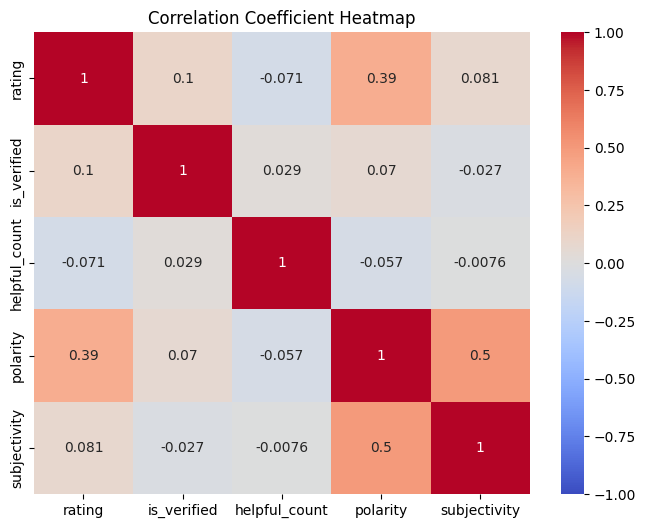

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Coefficient Heatmap')
plt.show()

In [ ]:
cov_matrix = numerical_df.cov()
cov_matrix

,rating,is_verified,helpful_count,polarity,subjectivity
rating,1.229891,0.036530,-1.096368,0.109249,0.019121
is_verified,0.036530,0.099770,0.129929,0.005520,-0.001789
helpful_count,-1.096368,0.129929,196.051473,-0.200489,-0.022553
polarity,0.109249,0.005520,-0.200489,0.063181,0.026659
subjectivity,0.019121,-0.001789,-0.022553,0.026659,0.045033


Low values of correlation among the variables indicate very weak relationship i.e. one variable is not dependent on the other.

In [ ]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

def trigrams(text):
  tokens = word_tokenize(text.lower())
  trigrams = list(ngrams(tokens, 3))
  return trigrams

reviews_df['trigrams'] = reviews_df['content'].apply(trigrams)
all_trigrams = [trigram for review in reviews_df['trigrams'] for trigram in review]
trigram_freq = Counter(all_trigrams)

sorted_trigram_freq = trigram_freq.most_common()
sorted_trigram_freq

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(('the', 'sound', 'is'), 168),
 (('the', 'sound', 'quality'), 155),
 (('!', '!', '!'), 142),
 (('.', 'it', "'s"), 127),
 (('sound', 'quality', 'is'), 127),
 (('.', 'i', 'have'), 115),
 (('.', 'the', 'sound'), 109),
 ((',', 'but', 'i'), 107),
 ((',', 'and', 'the'), 101),
 (('battery', 'life', 'is'), 101),
 (('this', 'speaker', 'is'), 97),
 (('the', 'battery', 'life'), 96),
 ((',', 'but', 'it'), 93),
 (('this', 'is', 'a'), 90),
 ((',', 'and', 'i'), 83),
 ((',', 'and', 'it'), 78),
 (('.', 'if', 'you'), 76),
 (('.', 'it', 'is'), 73),
 (('this', 'speaker', '.'), 69),
 (('the', 'bass', 'is'), 66),
 (('.', 'i', 'love'), 65),
 (('i', 'do', "n't"), 62),
 (('for', 'the', 'price'), 62),
 ((',', 'but', 'the'), 61),
 (('.', 'you', 'can'), 60),
 (('it', 'has', 'a'), 60),
 (('.', 'this', 'speaker'), 58),
 (('and', 'the', 'sound'), 58),
 (('.', 'this', 'is'), 57),
 (('the', 'speaker', 'is'), 57),
 (('of', 'the', 'speaker'), 57),
 (('out', 'of', 'the'), 55),
 (('.', 'it', 'has'), 55),
 (('it', "'s", '

We also performed trigram analysis and found out the 3 word combinations which appear the most in the reviews. Some of them are ('excellent', 'sound', 'quality'), ('very', 'good', 'sound'), ('ultimate', 'ears', 'boom'), etc and these indicates an overall positive sentiment towards the speakers available.

# A/B Testing for the two different versions of Beats Pill Speakers


We perform A/B Testing as part of Inferential Statistics to determine whether there is any statistically significant difference in which the two Beats Pill versions (Statement Read and Matte Black) are being perceived by the consumers.

In [ ]:
from scipy.stats import ttest_ind

# T-test for polarity
polarity_ttest = ttest_ind(beats_pill_MatteBlack['polarity'], beats_pill_StatementRed['polarity'], nan_policy='omit')

# T-test for subjectivity
subjectivity_ttest = ttest_ind(beats_pill_MatteBlack['subjectivity'], beats_pill_StatementRed['subjectivity'], nan_policy='omit')

# T-test for rating
rating_ttest = ttest_ind(beats_pill_MatteBlack['rating'], beats_pill_StatementRed['rating'], nan_policy='omit')

print("T-test for Polarity:\n", polarity_ttest)
print("\nT-test for Subjectivity:\n", subjectivity_ttest)
print("\nT-test for Rating:\n", rating_ttest)

T-test for Polarity:
 TtestResult(statistic=0.16736087049255907, pvalue=0.8673934008190756, df=110.0)

T-test for Subjectivity:
 TtestResult(statistic=-0.21057196679959303, pvalue=0.8336108598172607, df=110.0)

T-test for Rating:
 TtestResult(statistic=-0.2416091632196957, pvalue=0.8095328460622793, df=110.0)


A/B Testing confirmed that there is no statistically significant difference between the Matte Black and Statement Red version of the Beats Pill as both are perceived as almost same.

Note: As number of reviews available for the Beats Pill Speakers are less compared to others, the findings might change in the future.


## Time Series Analysis of the trend of Average Ratings with Time


We split the timestamp column to extract the date, month and year for analysis.

In [ ]:
def extract_date(timestamp):
    try:

        parts = timestamp.split()


        month = parts[-3]
        day = parts[-2].rstrip(',')
        year = parts[-1]


        date_str = f"{month} {day}, {year}"


        date = pd.to_datetime(date_str, format='%B %d, %Y', errors='coerce')

        return date
    except Exception as e:
        print(f"Error processing timestamp: {timestamp} -> {e}")
        return pd.NaT


reviews_df['date'] = reviews_df['timestamp'].apply(extract_date)




In [ ]:
daily_trends = reviews_df.groupby('date').agg({
    'rating': 'mean',
    'polarity': 'mean'
}).reset_index()

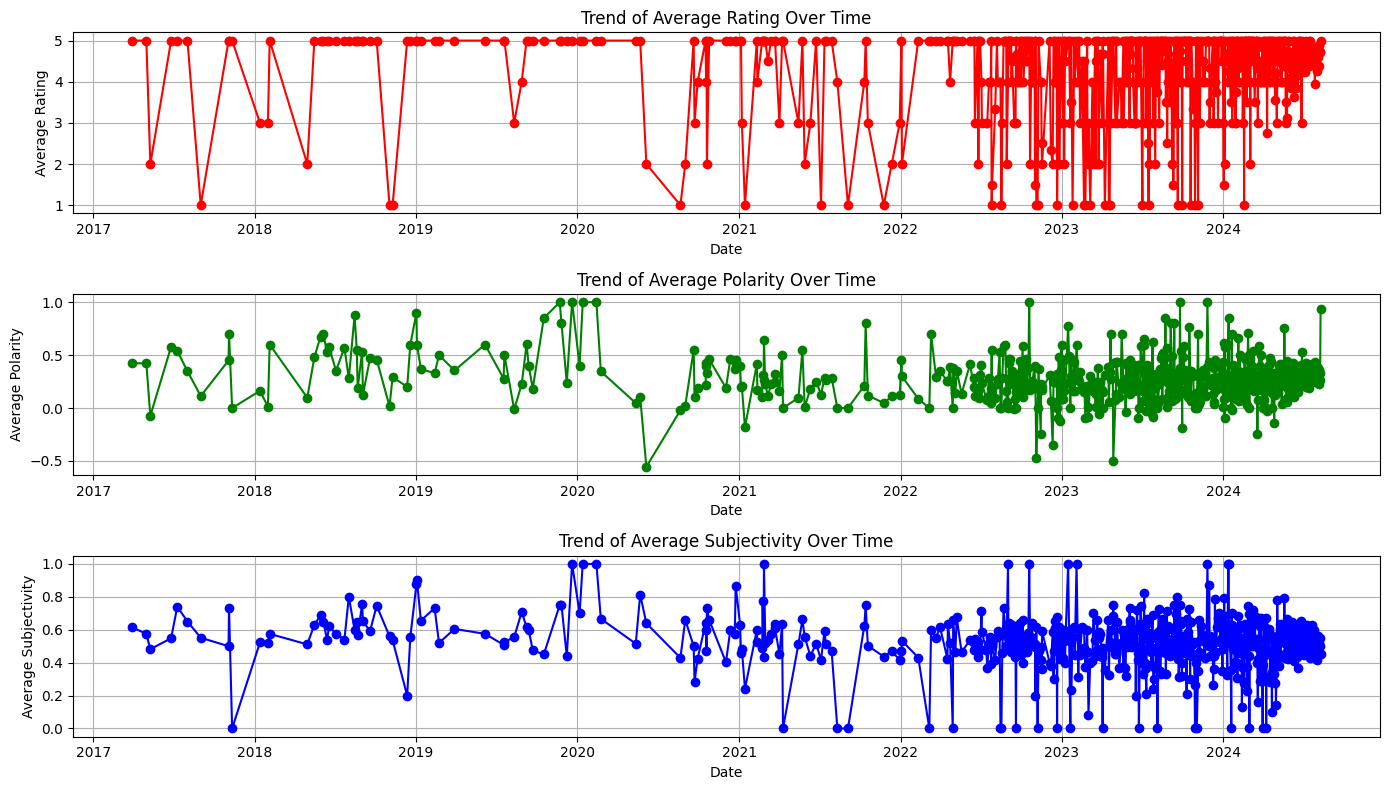

In [ ]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')


reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
reviews_df['polarity'] = pd.to_numeric(reviews_df['polarity'], errors='coerce')
reviews_df['subjectivity'] = pd.to_numeric(reviews_df['subjectivity'], errors='coerce')

trend_data = reviews_df.groupby('date').agg({
    'rating': 'mean',
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()


plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(trend_data['date'], trend_data['rating'], marker='o', linestyle='-', color='r')
plt.title('Trend of Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(trend_data['date'], trend_data['polarity'], marker='o', linestyle='-', color='g')
plt.title('Trend of Average Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(trend_data['date'], trend_data['subjectivity'], marker='o', linestyle='-', color='b')
plt.title('Trend of Average Subjectivity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.grid(True)

plt.tight_layout()
plt.show()


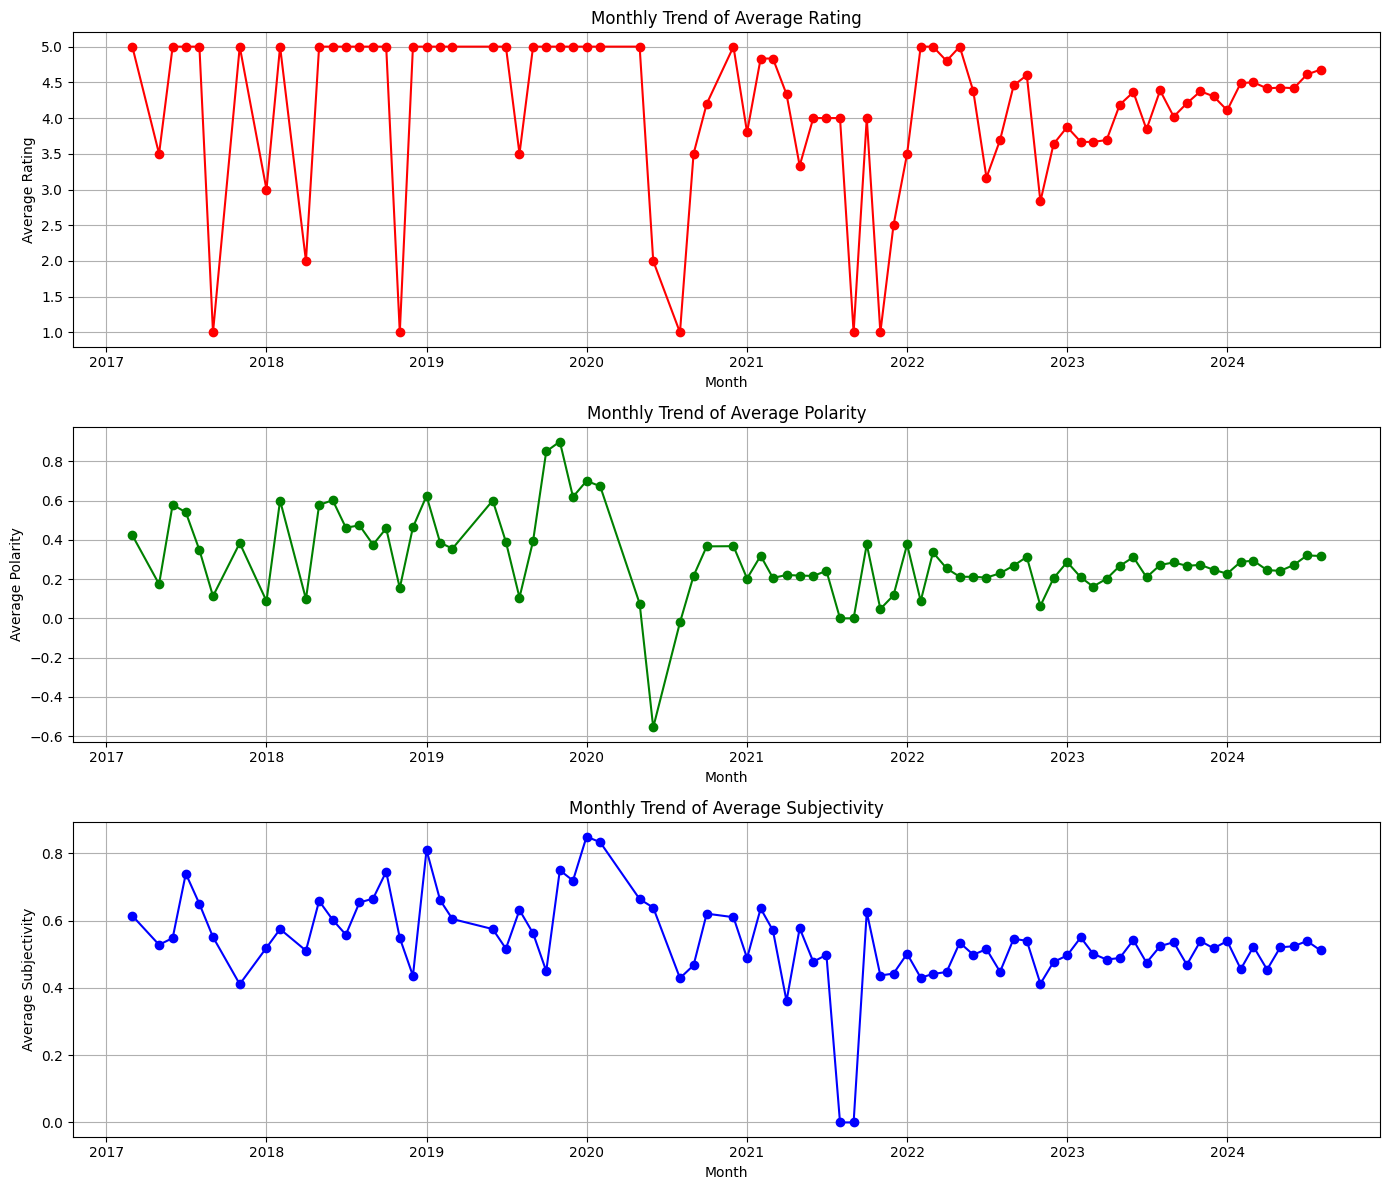

In [ ]:
reviews_df['year_month'] = reviews_df['date'].dt.to_period('M')

reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
reviews_df['polarity'] = pd.to_numeric(reviews_df['polarity'], errors='coerce')
reviews_df['subjectivity'] = pd.to_numeric(reviews_df['subjectivity'], errors='coerce')


monthly_trend_data = reviews_df.groupby('year_month').agg({
    'rating': 'mean',
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()


monthly_trend_data['year_month'] = monthly_trend_data['year_month'].astype(str)
monthly_trend_data['year_month'] = pd.to_datetime(monthly_trend_data['year_month'], format='%Y-%m')


plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
plt.plot(monthly_trend_data['year_month'], monthly_trend_data['rating'], marker='o', linestyle='-', color='r')
plt.title('Monthly Trend of Average Rating')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(monthly_trend_data['year_month'], monthly_trend_data['polarity'], marker='o', linestyle='-', color='g')
plt.title('Monthly Trend of Average Polarity')
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(monthly_trend_data['year_month'], monthly_trend_data['subjectivity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend of Average Subjectivity')
plt.xlabel('Month')
plt.ylabel('Average Subjectivity')
plt.grid(True)

plt.tight_layout()
plt.show()

1. Monthly trend of Average Rating is stabilising around 4.5 and Average polarity is also almost constant around 0.3. Average subjectivity is also not witnessing any drastic change.

2. Average Rating and Average Polarity for all the products have increased significantly in the recent years indicating that people are buying more speakers/expressing their opinion and more number of 5 star ratings are being garnered by the products than ever.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

Next, we use Gemini AI by using an API key to call the LLM. We provide the persona, context and the task to the model using prompt engineering, to receive efficient outputs to our queries.

In [ ]:
import os
import google.generativeai as genai
import time
#api_key = ""

In [ ]:
def analyze_reviews(reviews, api_key, prompt_message):
    import google.generativeai as genai

    # Configure the API key
    genai.configure(api_key=api_key)

    # Create a GenerativeModel instance
    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 0.8,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )


In [ ]:
reviews = reviews_df['content'].head(100).tolist()

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


Prompt 1. "You are a Data Scientist with more than 10 years of experience. We are trying to analyze how Beats speakers are performing compared to others and find out the scope for improvement, from the given dataset. Analyze the following reviews and generate insights as to how Beats speakers can perform better than all others :"

Insights 1: Based on the provided reviews, here's a breakdown of Beats speaker performance compared to competitors and potential areas for improvement:

**Strengths:**

* **Integration with Apple Ecosystem:** Beats speakers, especially the Pill, excel at seamless integration with iPhones and other Apple devices. This is a major selling point for Apple users.
* **Sound Quality:**  Reviews consistently praise Beats speakers for their clear, punchy sound with good bass. This is a core strength that positions them well against competitors.
* **Design and Portability:** The compact size and stylish design are often highlighted, making them desirable for portability and aesthetic appeal.
* **Durability:**  Waterproofing and general build quality are appreciated, making Beats speakers suitable for various environments.

**Weaknesses:**

* **Price:**  Beats speakers are often considered expensive compared to competitors offering similar features and sound quality. This is a significant barrier for many buyers.
* **Lack of Features:**  Compared to some competitors like Sony and JBL, Beats speakers sometimes lack advanced features like customizable EQ settings, stereo pairing, or app control.
* **Battery Life:**  While the Pill boasts a long battery life, some other brands offer comparable or even better battery performance.
* **Bass Performance:**  While praised for clarity, some users find the bass lacking compared to competitors like JBL, particularly at higher volumes.

**Opportunities for Improvement:**

* **Competitive Pricing:** Consider offering more affordable models or promotions to attract a wider audience.
* **Enhanced Features:**  Implement features like customizable EQ, stereo pairing, and a more robust app for greater user control and customization.
* **Improved Bass Performance:**  Focus on enhancing bass response, especially at higher volumes, to compete with brands known for their powerful bass.
* **App Development:**  Invest in a dedicated app that offers more functionality beyond basic control, including EQ adjustments, firmware updates, and additional features.
* **Marketing Focus:**  Highlight the strong integration with the Apple ecosystem to attract Apple users and further differentiate from competitors.

**Overall:**

Beats speakers have a strong foundation with their sound quality, design, and integration with the Apple ecosystem. By addressing the identified weaknesses through competitive pricing, enhanced features, and improved bass performance, Beats can further solidify their position as a leading brand in the portable speaker market.

Prompt 2: "You are a Data Scientist with more than 10 years of experience. Analyze the following trend of reviews and extract the pain points :"

Insights 2: Based on your provided reviews, here are the pain points users have experienced with portable Bluetooth speakers:

**Sound Quality:**

* **Lack of Bass:**  Several users found the bass to be lacking, especially when compared to other speakers in the same price range.
* **Muddy Sound:** Some users reported a muddy or unclear sound quality, especially at higher volumes.
* **Overpowering Bass:**  While some speakers were criticized for lacking bass, others had the opposite problem, with bass being overpowering and affecting the clarity of other frequencies.
* **Compression at High Volumes:** Some speakers exhibited sound compression at higher volumes, resulting in a flatline of bass and a change in sound profile.
* **Inconsistent Sound Quality:**  Some speakers produced inconsistent sound quality, with some songs sounding flat while others sounded rich and deep, potentially due to variations in track quality and recording.

**Features and Functionality:**

* **Limited EQ Control:** Many speakers lacked comprehensive EQ controls, limiting user customization of the sound profile.
* **Outdated Bluetooth:** Some speakers used outdated Bluetooth versions, leading to issues with latency and compatibility with newer devices.
* **App Issues:** Several apps were criticized for being clunky, lacking features, or having connectivity issues.
* **Unreliable Battery Life:** Some speakers failed to live up to advertised battery life claims.
* **Slow Charging Time:**  Some speakers took a long time to charge, which was considered a drawback by some users.
* **Bluetooth Pairing Issues:** Some users reported difficulties with Bluetooth pairing, including slow discovery times and occasional connection drops.

**Build and Design:**

* **Flimsy Packaging:**  Some speakers arrived in flimsy packaging, raising concerns about potential damage during delivery.
* **Limited Portability:**  While most speakers were advertised as portable, some users found them to be bulky or heavy, making them less than ideal for taking on the go.
* **Unclear Button Labeling:**  Some speakers had unclear or invisible button labeling, making it difficult to understand their functions.
* **Unnecessary App Integration:** Some users found the app integration to be unnecessary and even detrimental, as it didn't add much value or sometimes even hindered the speaker's functionality.

**Other Pain Points:**

* **Price:**  Some users felt the price of certain speakers was too high for the features and performance offered.
* **Durability Concerns:** A few users reported issues with durability, including scratches, dents, or malfunctioning components.

**Overall:**

While portable Bluetooth speakers offer a convenient way to enjoy music on the go, it's clear that users are still looking for improvements in sound quality, features, and functionality.  By addressing these pain points, manufacturers can create even more compelling and user-friendly portable audio solutions.

Prompt 3: "You are a Data Scientist with more than 10 years of experience. Analyze the following trend of reviews and provide insights on the usp of the best selling speakers :"

Insights 3: Based on the reviews, here's an analysis of the USPs (Unique Selling Propositions) for the best-selling speakers:

**1. Sony ULT Field 1:**

* **Powerful, clear sound for outdoor gatherings:**  Reviewers consistently praise the impressive sound quality, particularly the bass, for its size. The ULT button provides an extra boost for a more impactful experience.
* **Durable and waterproof:**  Designed for outdoor use, it can withstand splashes and even submersion in water.
* **Versatile portability:**  Compact size, included carrying strap, and ability to hang on things make it easy to take anywhere.
* **Useful app for EQ settings:**  While the physical ULT button is appreciated, the app allows for more customization and additional features.

**2. Bose SoundLink Flex:**

* **Punchy, clear sound in a compact package:**  Reviewers note the impressive bass and overall sound quality for its size. It can fill a room with music without being overly loud.
* **Durable and weatherproof:**  The rugged construction makes it suitable for outdoor use, even in wet conditions.
* **Intelligent design:**  The speaker automatically adjusts sound based on its position, ensuring optimal audio quality regardless of how it's placed.
* **Simple and intuitive to use:**  No need for complicated EQ settings, it sounds good right out of the box.

**3. Ultimate Ears BOOM 3:**

* **Waterproof and durable for outdoor adventures:**  Reviewers highlight its ability to withstand water and drops, making it perfect for the beach, pool, or camping.
* **360° sound for a wider listening experience:**  The sound radiates in all directions, making it ideal for gatherings with people around.
* **Long battery life:**  The speaker can play for hours on a single charge, perfect for all-day outdoor events.
* **PartyUp feature for even louder sound:**  Allows for pairing with multiple BOOM 3 speakers to create a larger sound system.

**4. JBL Charge 5:**

* **Powerful, clear sound with deep bass:**  The Charge 5 consistently impresses with its audio quality, particularly the bass, which reviewers find satisfying and impactful.
* **Long battery life and powerbank functionality:**  The speaker can play for hours on a single charge and can also be used to charge other devices.
* **Waterproof and durable design:**  Built to withstand water and drops, making it suitable for outdoor use.
* **PartyBoost for multiple speakers:**  Allows for pairing with other JBL speakers for a larger sound system.

**5. Beats Pill (2024):**

* **Premium design and sound quality:**  The speaker is stylish and well-built, delivering clear and punchy audio with balanced bass.
* **Seamless integration with Apple devices:**  Connects instantly to iPhones and iPads with a satisfying animation.
* **Versatile functionality:**  Doubles as a speakerphone for taking calls, and can connect via USB-C for lossless music playback.
* **Long battery life:**  Advertised at 24 hours, the battery is a major selling point.

**6. Marshall Emberton II:**

* **Iconic Marshall design with powerful sound:**  The speaker combines the classic Marshall look with impressive sound quality.
* **Compact and portable:**  Easy to take anywhere, making it ideal for travel and outdoor use.
* **Dual driver system for stereo sound:**  Creates a more immersive listening experience than typical mono speakers.
* **Long battery life:**  Can play for up to 30 hours on a single charge.

**7. Sony XG300:**

* **Powerful bass and clear audio:**  The speaker delivers a satisfying amount of bass without sacrificing clarity.
* **Customizable EQ and features:**  The Sony Music Center app allows for tweaking the sound to personal preferences and offers features like Live Audio.
* **Speaker grouping feature:**  Can be paired with other Sony speakers for a larger, more immersive sound system.
* **Quick charging capabilities:**  The battery can be quickly charged, minimizing downtime.

**Overall:**

The best-selling speakers in this list all share a focus on portability, durability, and excellent sound quality. They cater to different needs and preferences, offering features like extra bass, waterproof design, party-friendly connectivity, and seamless integration with specific devices. The key takeaway is that the best speaker for you depends on your individual priorities and budget.


### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

These insights provide crucial information for Beats by Dre and their future strategies.

1. Understanding the unique selling points of its competitors, Beats can formulate its strategy accordingly to gain an edge over its competitors.

2. Understanding the pain points of customers are vital for product improvement to cater to the market demands.

3. Understanding the strengths and weaknesses of both Beats Pill and its competitors are critical for innovation and overall customer satisfaction.

## 8. Comparative Analysis

### 8.1 Competitor Overview
List the competitors analyzed and provide a brief overview of their market positioning.

The focus have been mainly on the following competitors:

1. House of Marley - Eco-friendly focus
2. JBL Flip 6 - Powerful and deep bass
3. JBL Charge 5 and 4 - Larger portable speakers with power bank functionality
4. Bose Soundlink Flex - superior sound quality and clarity

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


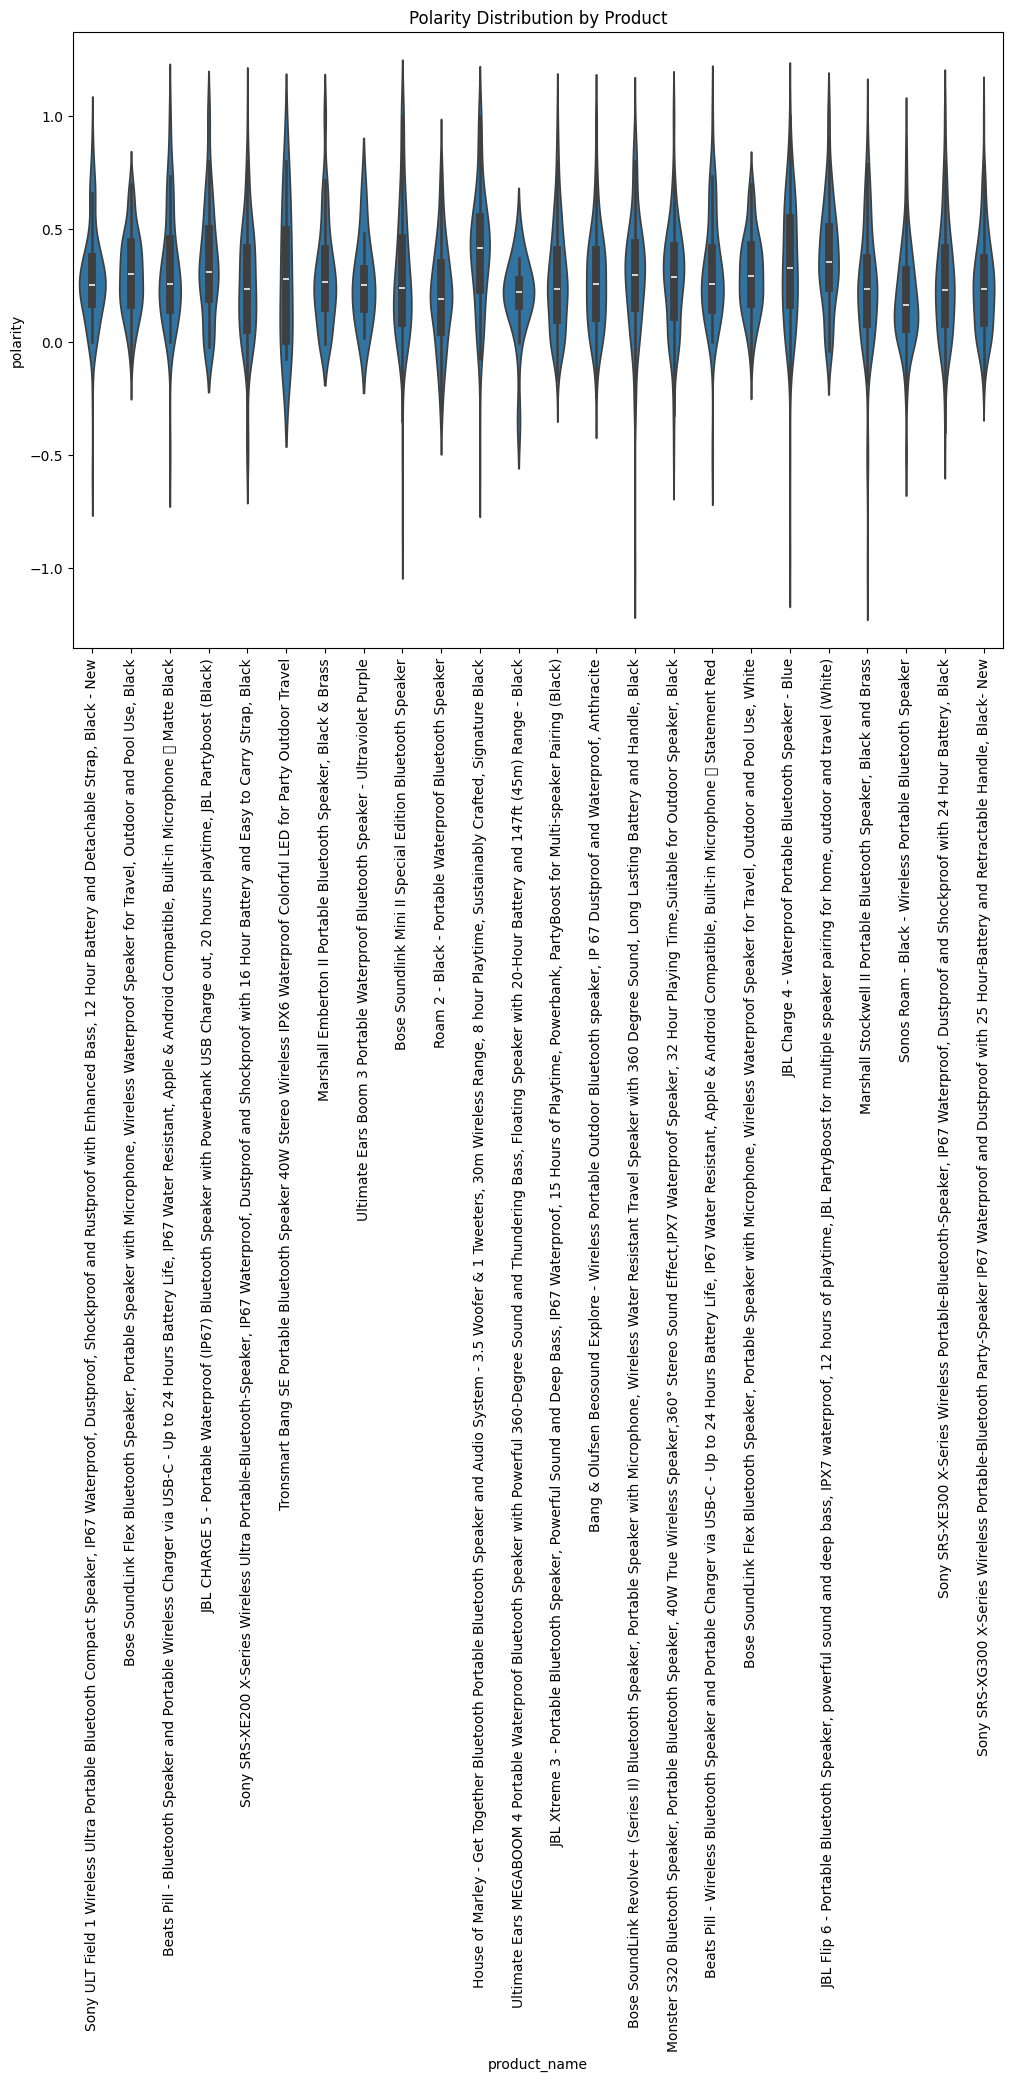

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='product_name', y='polarity', data=reviews_df)
plt.xticks(rotation=90)
plt.title('Polarity Distribution by Product')
plt.show()

Speakers with higher positive sentiment than Beats Pills are in descending order:

1. House of Marley
2. JBL Flip 6
3. JBL Charge 5
4. JBL Charge 4

Similarities with Beats Pill are mainly the Bluetooth connectivity and strong branding.

Differences are in the price point and emphasis on audio.

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

SWOT Analysis is as follows:

Strengths:
1. Strong brand value
2. Seamless integration with Apple (extensive resources)
3. Portable
4. Availability of different color versions
5. Upto 24 hours of battery life for all-day playback

Weaknesses:
1. High price point
2. Durability issues
3. Not suitable for rugged use

Opportunities:
1. Targeting broader customer base by launching a Beats Pill mid-ranged price version speaker, with reduced battery life or other features.
2. Innovations powered by Apple's advanced technologies
3. Increasing brand loyalty
4. Experimenting with more color versions

Threats:
1. High competition from other strong brands leading to constant need for innovation and aggressive marketing strategies
2. Low cost counterfeit products can pose significant damage to the brand's reputation
3. Demand for premium products depends on purchasing power and overall economic conditions which is subject to change with time leading to uncertainty

## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

1. Higher quality of building materials for handling rugged use
2. Focus on eco-friendly material can help in targeting a particular customer segment
3. Increasing durability by introducing waterproof and dustproof product
4. Product improvements to address the techincal issues like Speaker dropout is essential as a couple of reviews mention this problem.


### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

1. Focus on more collaborations with high profile celebrities for brand promotion can help influence customer perception.
2. Market expansion by introducing different versions of the product targeting different income groups.

### 9.3 Future Research
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

1. At the time this report has been created, less than 100 reviews for Beats Pill Speakers are available which are not sufficient for complete analysis. Against this, there are hundreds of reviews available for its competitors.

2. Transformers such as BERT can be used for sentiment analysis of the reviews as it is more robust compared to libraries such as NLTK or Textblob or other traditional NLP methods. The libraries suffer from some flaws like they are unable to detect tone (like sarcasm) in the content which might significantly impact its sentiment analysis score.

## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

The key findings are as follows:
1. Products like House of Marley, JBL Flip 6 and JBL Charge 5 (and 4) enjoy higher average polarity scores (positive sentiment) than Beats Pill among its customers.
2. There is no statistically significant difference between the two versions of the Beats Pill Speakers.
3. The ratings distribution in the dataset is left skewed indicating higher percentage of ratings in the 4.5 to 5 range.
4. The overall consumer sentiment in the market towards the speaker segment is positive with 5 star ratings being the most frequent.
5. Many reviews mentioned the lack of bass in different speakers and so there is room for improvement in this direction.

The overall project involves end to end process from data collection to generating final report for understanding the consumer trend in the market and how Beats Pill fares compared to its competitors.
The project has been able to draw some crucial insights from the voice of the consumers and will help in making informed business decisions in the future in order to address the pain points and provide customers with a seamless product experience.

## 11. References
List all the sources, tools, and references used in the project.


1. Amazon.com -  Amazon website from where all the data has been collected.
2. Gemini API - The LLM which has been called using the API for generating insights based on the given prompts
3. Beatsbydre.com - The official website of Beats by Dre
4. Textblob - Python library for performing sentiment analysis
5. Matplotlib - Python library for creating data visualizations
6. Numpy- Python library for data manipulation
7. Pandas - Python library for data cleaning and preprocessing
8. Oxylabs.io - Web scrapper for scrapping data from Amazon

In [ ]:
average_metrics = reviews_df.groupby('product_name').agg({
    'polarity': 'mean',
    'subjectivity': 'mean',
    'rating': 'mean'
}).reset_index()

average_metrics['is_beats_pill'] = average_metrics['product_name'].str.contains('Beats Pill')

beats_pill_metrics = average_metrics[average_metrics['is_beats_pill']][['polarity', 'rating']].mean()

competitors = average_metrics[~average_metrics['is_beats_pill']]

percentage_higher_polarity = (competitors['polarity'] > beats_pill_metrics['polarity']).mean() * 100
percentage_higher_rating = (competitors['rating'] > beats_pill_metrics['rating']).mean() * 100

print(f"Percentage of competitors ahead of Beats Pill in Polarity: {percentage_higher_polarity:.2f}%")
print(f"Percentage of competitors ahead of Beats Pill in Ratings: {percentage_higher_rating:.2f}%")



Percentage of competitors ahead of Beats Pill in Polarity: 18.18%
Percentage of competitors ahead of Beats Pill in Ratings: 45.45%
